In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/titanic.csv')

In [3]:
print("First few rows of the dataset and shape:")
print(data.shape)
data.head()

First few rows of the dataset and shape:
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("\nData structure information:")
print(data.info())


Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print("\nSummary statistics of categorical columns:")
print(data.describe(include='O'))


Summary statistics of categorical columns:
                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [7]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [9]:
print("\nValue counts for the 'Sex' column:")
print(data['Sex'].value_counts())


Value counts for the 'Sex' column:
male      577
female    314
Name: Sex, dtype: int64


In [10]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


In [11]:
# After obtaining a quick overview of the dataset, we usually proceed to split the data into training and testing sets.
# However, if we know what we are doing, it's beneficial to analyze the data more thoroughly before splitting.
# This allows us to examine all categorical features, check for missing data, and understand the distribution of variables.
# 
# Analyzing before the split ensures that we identify any patterns, anomalies, or features that may affect model performance.
# For example, if we analyze the data after splitting, we might miss important categorical variables or nuances in the data.
# This phase is crucial for ensuring that our model is built on a solid understanding of the dataset, which can lead to better performance.

# Exploratory Data Analysis (EDA)

### Analyze the target variable

Target variable distribution (Survived):
0    0.616162
1    0.383838
Name: Survived, dtype: float64


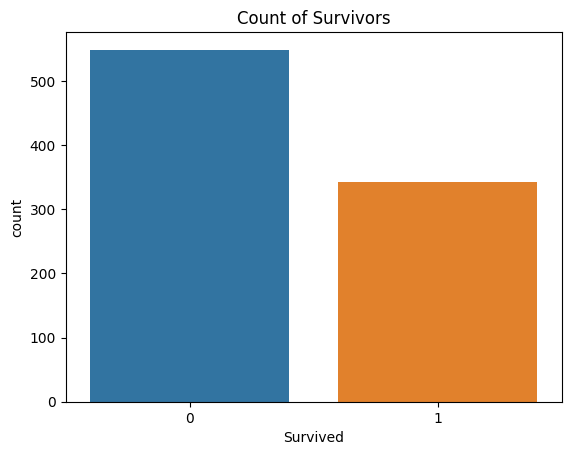

In [12]:
print("Target variable distribution (Survived):")
print(data['Survived'].value_counts(normalize=True))
sns.countplot(x='Survived', data=data)
plt.title('Count of Survivors')
plt.show()

### Split variables into numerical and categorical

In [13]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### Assess Missing Values

In [14]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


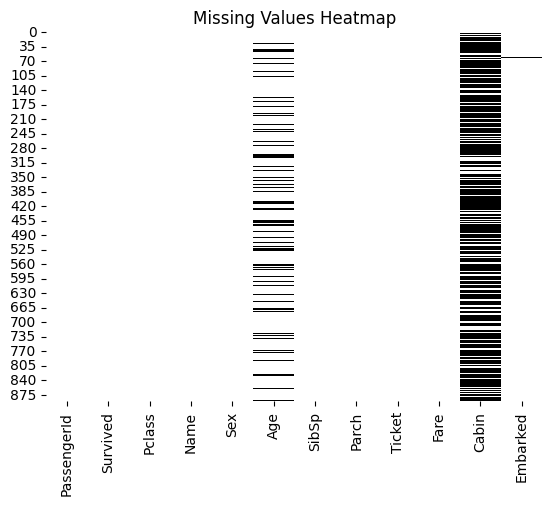

In [15]:
# Visualize Missing Values
sns.heatmap(data.isnull(), cbar=False, cmap='binary')
plt.title('Missing Values Heatmap')
plt.show()

### Explore relationships between features and the target variable

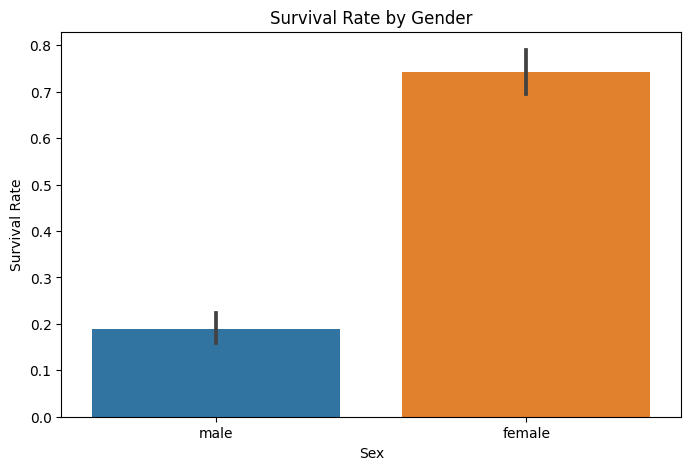

In [16]:
# Relationship between Gender and Survival
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

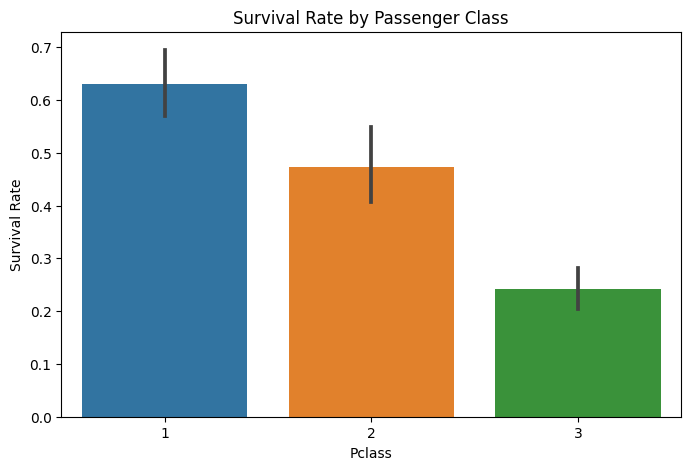

In [17]:
# Relationship between Pclass and Survival
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

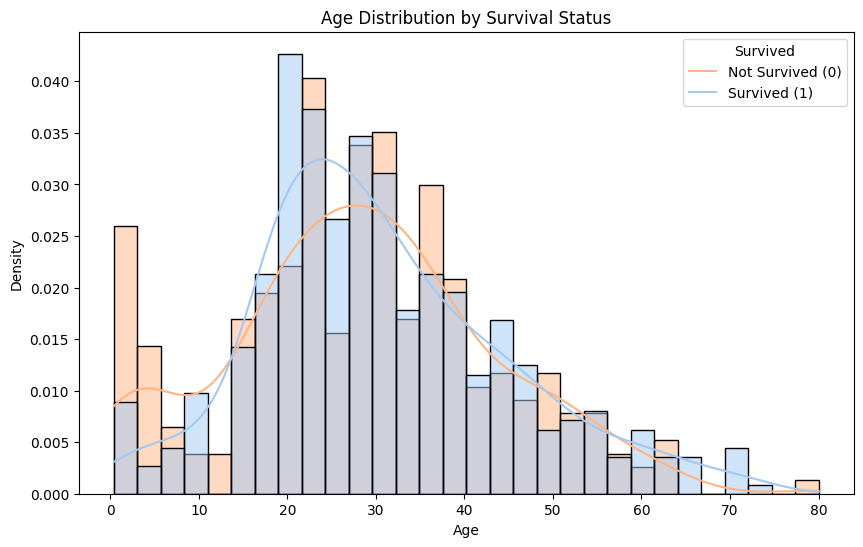

In [18]:
# Visualize Age Distribution with Survival Hue
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True, 
             palette='pastel', stat='density', common_norm=False)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

# Data Cleaning

In [19]:
row_data = data.copy()

### Type Conversion

In [20]:
# Define a dictionary to specify the desired data types for each column
type_mapping = {
    'PassengerId': int,
    'Survived': int,
    'Pclass': str,  # Change to string as you mentioned previously
    'Name': str,
    'Sex': str,
    'Age': float,
    'SibSp': int,
    'Parch': int,
    'Ticket': str,
    'Fare': float,
    'Cabin': str,
    'Embarked': str
}

# Convert columns to their specified types
for column, dtype in type_mapping.items():
    data[column] = data[column].astype(dtype)

# Display the data types after conversion
print("\nData Types After Conversion:")
print(data.dtypes)


Data Types After Conversion:
PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Filter Bad Data

In [21]:
original_shape = data.shape
print("\nOriginal shape of the data:")
print(original_shape)

# Assume bad data: Age should be in the range 0-120 and Fare should not be 0
bad_age_condition = (data['Age'] < 5) | (data['Age'] > 70)
bad_fare_condition = data['Fare'] <= 0

# Filter out bad data
filtered_data = data[~(bad_age_condition | bad_fare_condition)]

# Display the shape of the DataFrame after filtering
filtered_shape = filtered_data.shape
print("\nShape of the data after filtering bad data:")
print(filtered_shape)

# Calculate and display the number of rows filtered out
filtered_rows = original_shape[0] - filtered_shape[0]
print("\nNumber of rows filtered out:")
print(filtered_rows)


Original shape of the data:
(891, 12)

Shape of the data after filtering bad data:
(831, 12)

Number of rows filtered out:
60


### Replace and Map Categories to Fix Them

In [22]:
# Example: Standardizing 'Sex' column
data['Sex'] = data['Sex'].replace({'male': 'Male', 'female': 'Female', 'F': 'Female', 'M': 'Male'})

# Display unique values in 'Sex' to confirm changes
print("\nUnique values in the 'Sex' column after mapping:")
print(data['Sex'].unique())


Unique values in the 'Sex' column after mapping:
['Male' 'Female']


### Drop Unnecessary Features

In [23]:
# Make 'PassengerId' the index and drop unnecessary columns
data.set_index('PassengerId', inplace=True)  # Set 'PassengerId' as index
data.drop(columns=['Cabin', 'Ticket'], inplace=True)  # Drop unnecessary columns

# Display the shape of the DataFrame after dropping columns
print("\nShape of the data after dropping unnecessary features:")
print(data.shape)


Shape of the data after dropping unnecessary features:
(891, 9)


In [24]:
# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
data.head()


Cleaned DataFrame:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,8.0500,S


# Split the data into Training, Validation, and Test sets

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

In [26]:
# Let's say our target variable is 'Survived'
X = data.drop('Survived', axis=1)
y = data['Survived']

### Random Split

In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Show value counts for target variable in random split
print("\nValue Counts for Target Variable (Random Split):")
print("Training set (Survived):")
print(y_train.value_counts(normalize=True))  
print("\nValidation set (Survived):")
print(y_val.value_counts(normalize=True))    
print("\nTest set (Survived):")
print(y_test.value_counts(normalize=True))   


Value Counts for Target Variable (Random Split):
Training set (Survived):
0    0.623596
1    0.376404
Name: Survived, dtype: float64

Validation set (Survived):
0    0.634831
1    0.365169
Name: Survived, dtype: float64

Test set (Survived):
0    0.575419
1    0.424581
Name: Survived, dtype: float64


### Stratified Split

In [28]:
# This ensures that the proportions of classes are maintained in the split
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42, stratify=y_temp_strat)

# Show value counts for target variable in stratified split
print("\nValue Counts for Target Variable (Stratified Split):")
print("Training set (Survived):")
print(y_train_strat.value_counts(normalize=True))
print("\nValidation set (Survived):")
print(y_val_strat.value_counts(normalize=True))  
print("\nTest set (Survived):")
print(y_test_strat.value_counts(normalize=True)) 


Value Counts for Target Variable (Stratified Split):
Training set (Survived):
0    0.616105
1    0.383895
Name: Survived, dtype: float64

Validation set (Survived):
0    0.617978
1    0.382022
Name: Survived, dtype: float64

Test set (Survived):
0    0.614525
1    0.385475
Name: Survived, dtype: float64


### Cross-validation (Data Leakage)

##### Wrong

In [29]:
X_clean = X.copy()
y_clean = y.copy()

# Initialize a Dummy Classifier for illustration purposes
dummy_clf = DummyClassifier(strategy='most_frequent')

# Set up a stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get scores
cross_val_scores = cross_val_score(dummy_clf, X_clean, y_clean, cv=skf)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.61452514 0.61797753 0.61797753 0.61797753 0.61235955]


##### Right

In [30]:
# Initialize a Dummy Classifier for illustration purposes
dummy_clf = DummyClassifier(strategy='most_frequent')

# Set up a stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a custom class for data cleaning (though it does nothing in this case)
class DataCleaner:
    def clean(self, X):
        # In a real scenario, cleaning steps would go here
        return X  # Return the data as is without any changes

# Cross-validation loop
cross_val_scores = []

for train_index, val_index in skf.split(X, y):
    # Split the data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Initialize DataCleaner
    cleaner = DataCleaner()

    # Clean the training and validation data (currently just returns as is)
    X_train_cleaned = cleaner.clean(X_train)
    X_val_cleaned = cleaner.clean(X_val)

    # Fit the model on the cleaned training data
    dummy_clf.fit(X_train_cleaned, y_train)

    # Predict on the cleaned validation data and evaluate the model
    score = dummy_clf.score(X_val_cleaned, y_val)
    cross_val_scores.append(score)

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.6145251396648045, 0.6179775280898876, 0.6179775280898876, 0.6179775280898876, 0.6123595505617978]
